Using a RNN for text analysis on the IMDB dataset

In [1]:
#Just using imports from colab tutorial
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Flatten
from keras.layers import LSTM, CuDNNLSTM
from keras.datasets import imdb

from distutils.version import LooseVersion as LV
from keras import __version__
from keras import backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using TensorFlow backend.


Using Keras version: 2.2.4 backend: tensorflow


Need to get data and get it into the correct shape to be usable!

In [0]:
# using tutorial code to just grab the data and shape it
# determines how many words to sample
number_words = 10000
# cut texts after this number of words
max_len = 80

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=number_words)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
x_train: (25000,)
x_test: (25000,)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


Create super basic model using embedding layer

In [0]:
#create base model object
base_model = Sequential()
base_model.add(Embedding(10000, 8, input_length=max_len)) #using the embedding layer to make word embeddings instead of vectorizing the words

base_model.add(Flatten())

base_model.add(Dense(1, activation='sigmoid'))
base_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
base_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
#run it!
base_history = base_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 250us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 3s 128us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 3s 127us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 3s 127us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 3s 131us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 3s 126us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 3s 128us/step - l

We ended up getting validation accuracy of .74 just like in the book!
But now its time to increase performance by using a RNN instead of a Feed-forward network.

In [0]:
#update max_len for the RNN example
max_len = 80
embedding_dims = 50
lstm_units = 32
#recurrent imdb model
r_i_model = Sequential()
r_i_model.add(Embedding(number_words, embedding_dims, input_length=max_len))
r_i_model.add(Dropout(0.2)) #stop overfitting NOW!
r_i_model.add(LSTM(lstm_units)) #this is what makes it an RNN
r_i_model.add(Dense(1, activation='sigmoid'))

r_i_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print(r_i_model.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 50)            500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 510,657
Trainable params: 510,657
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#LETS GO
epochs = 5
validation_split = 0.2

r_i_history = r_i_model.fit(x_train, y_train, batch_size=128,
          epochs=epochs, 
          validation_split=validation_split)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 29s 1ms/step - loss: 0.5158 - acc: 0.7449 - val_loss: 0.4521 - val_acc: 0.7898
Epoch 2/5
20000/20000 [==============================] - 28s 1ms/step - loss: 0.3294 - acc: 0.8621 - val_loss: 0.3521 - val_acc: 0.8420
Epoch 3/5
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2766 - acc: 0.8885 - val_loss: 0.3765 - val_acc: 0.8308
Epoch 4/5
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2500 - acc: 0.8996 - val_loss: 0.3558 - val_acc: 0.8424
Epoch 5/5
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2298 - acc: 0.9095 - val_loss: 0.3885 - val_acc: 0.8438


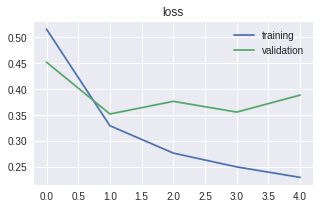

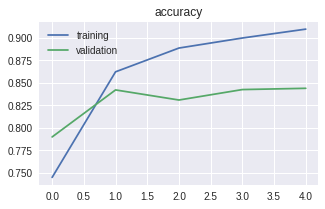

In [0]:
plt.figure(figsize=(5,3))
plt.plot(r_i_history.epoch,r_i_history.history['loss'], label='training')
plt.plot(r_i_history.epoch,r_i_history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

plt.figure(figsize=(5,3))
plt.plot(r_i_history.epoch,r_i_history.history['acc'], label='training')
plt.plot(r_i_history.epoch,r_i_history.history['val_acc'], label='validation')
plt.title('accuracy')
plt.legend(loc='best');

Looks like 3 epochs is the magic number. But what if we stack LSTM layers?

In [0]:
r_model2 = Sequential()
r_model2.add(Embedding(number_words, embedding_dims, input_length=max_len))
r_model2.add(Dropout(0.2))
r_model2.add(LSTM(lstm_units, return_sequences=True))
r_model2.add(LSTM(lstm_units)) #and here... we... go.
r_model2.add(Dense(1, activation='sigmoid'))

r_model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print(r_model2.summary())
#even with TPU acceleration this takes a while

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 80, 50)            500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 80, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80, 32)            10624     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 518,977
Trainable params: 518,977
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#training the stacked RNN
r_history2 = r_model2.fit(x_train, y_train, batch_size=128,
          epochs=epochs, 
          validation_split=validation_split)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 54s 3ms/step - loss: 0.4868 - acc: 0.7552 - val_loss: 0.4297 - val_acc: 0.7994
Epoch 2/5
20000/20000 [==============================] - 53s 3ms/step - loss: 0.3289 - acc: 0.8636 - val_loss: 0.3665 - val_acc: 0.8360
Epoch 3/5
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2792 - acc: 0.8877 - val_loss: 0.3591 - val_acc: 0.8420
Epoch 4/5
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2484 - acc: 0.9018 - val_loss: 0.3657 - val_acc: 0.8354
Epoch 5/5
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2285 - acc: 0.9116 - val_loss: 0.3889 - val_acc: 0.8366


Looks like stacking LSTM layers didn't have a very big effect on performance...

<Figure size 576x396 with 0 Axes>

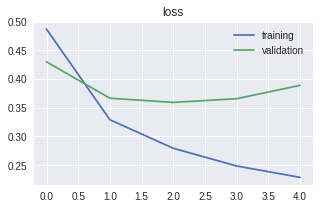

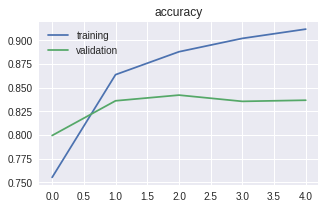

In [0]:
plt.clf()
plt.figure(figsize=(5,3))
plt.plot(r_history2.epoch,r_history2.history['loss'], label='training')
plt.plot(r_history2.epoch,r_history2.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

plt.figure(figsize=(5,3))
plt.plot(r_history2.epoch,r_history2.history['acc'], label='training')
plt.plot(r_history2.epoch,r_history2.history['val_acc'], label='validation')
plt.title('accuracy')
plt.legend(loc='best');

Looks like 1 epoch is the best here... starts overfitting really fast. Probably should add more dropout layers after the RNNs.

In [7]:
#Moving onward to the JENA climate dataset! It took a while to get this to work,
#but I eventually had to settle on using my google drive instead of uploading the 
#file itself. If i uploaded the file, it would eventually go through, but whenever
#I would go to open it, the runtime would crash. Using google drive seems to alleviate
#that issue
from google.colab import drive
drive.mount('/content/gdrive')
#need to have file locally downloaded... this takes a while!

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
f = open('/content/gdrive/My Drive/jena_climate_2009_2016.csv')

In [9]:
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [0]:
import numpy as np
#create those 420000 or so lines into a numpy array
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [0]:
#this cell normalizes (standardizes?) the data and creates variables
lookback = 720 # 5 days
steps = 6 # sampling 1 point per hour
delay = 144 # predicting 24 hours in the future
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

My lack of compsci knowledge is showing in the next block. There are a few keywords that I don't know what they do, like yield. Apparently its like return, only it returns a generator instead of whatever it is that return returns. The rest of it seems to make sense, but I don't have the programming chops to write something like this from scratch. As an aside, I've never used numpy.randint before (this is my first time seeing it) but its pretty easy to guess what it does.

In [0]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [0]:
#this block is essentially our train/validation/test split.
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)


val_steps = (300000 - 200001 - lookback) // batch_size


test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [11]:
#adding baseline because its there so why not
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.28973597299053566


In [0]:
#simple machine learning approach
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=20,validation_data=val_gen,  validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 14s 28ms/step - loss: 1.4619 - val_loss: 0.6840
Epoch 2/20
500/500 [==============================] - 14s 28ms/step - loss: 0.4792 - val_loss: 0.4415
Epoch 3/20
500/500 [==============================] - 14s 28ms/step - loss: 0.3071 - val_loss: 0.3026
Epoch 4/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2702 - val_loss: 0.3893
Epoch 5/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2563 - val_loss: 0.3201
Epoch 6/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2470 - val_loss: 0.3234
Epoch 7/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2409 - val_loss: 0.3135
Epoch 8/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2336 - val_loss: 0.3218
Epoch 9/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2283 - val_loss: 0.3385
Epoch 10/20
500/500 [==============================] - 14s 27ms/step - loss: 0.224

KeyboardInterrupt: ignored

I stopped the last model because it was taking a while and looked like it started overfitting very early.

In [0]:
#now we are doing our first recurrent version

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500,epochs=6,validation_data=val_gen,validation_steps=val_steps)

Epoch 1/6
500/500 [==============================] - 203s 406ms/step - loss: 0.3052 - val_loss: 0.2703
Epoch 2/6
500/500 [==============================] - 200s 399ms/step - loss: 0.2861 - val_loss: 0.2737
Epoch 3/6
500/500 [==============================] - 200s 400ms/step - loss: 0.2807 - val_loss: 0.2647
Epoch 4/6
500/500 [==============================] - 199s 398ms/step - loss: 0.2746 - val_loss: 0.2706
Epoch 5/6
500/500 [==============================] - 199s 398ms/step - loss: 0.2693 - val_loss: 0.2670
Epoch 6/6
500/500 [==============================] - 198s 397ms/step - loss: 0.2623 - val_loss: 0.2701


Wow. Even a mere 6 epochs took like half an hour to train.

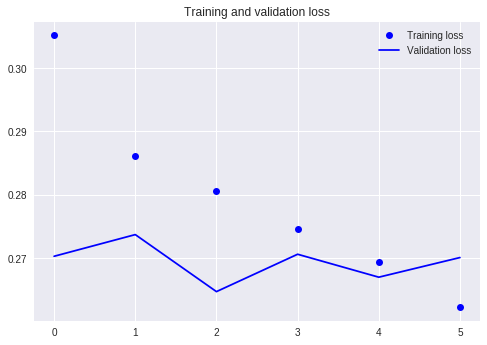

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

You can see it starts to overfit after 6 epochs.

In [0]:
#A lot of epochs, a lot of time, and recurrent dropout.
model = Sequential()
model.add(layers.GRU(32,dropout=0.2,recurrent_dropout=0.2,input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,validation_data=val_gen,validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 229s 459ms/step - loss: 0.3394 - val_loss: 0.2741
Epoch 2/40
500/500 [==============================] - 226s 452ms/step - loss: 0.3143 - val_loss: 0.2715
Epoch 3/40
500/500 [==============================] - 225s 451ms/step - loss: 0.3101 - val_loss: 0.2734
Epoch 4/40
500/500 [==============================] - 225s 450ms/step - loss: 0.3046 - val_loss: 0.2728
Epoch 5/40
500/500 [==============================] - 225s 450ms/step - loss: 0.3029 - val_loss: 0.2665
Epoch 6/40
500/500 [==============================] - 225s 450ms/step - loss: 0.2996 - val_loss: 0.2641
Epoch 7/40
500/500 [==============================] - 225s 449ms/step - loss: 0.2974 - val_loss: 0.2691
Epoch 8/40
500/500 [==============================] - 224s 449ms/step - loss: 0.2957 - val_loss: 0.2657
Epoch 9/40
500/500 [==============================] - 224s 448ms/step - loss: 0.2943 - val_loss: 0.2651
Epoch 10/40
500/500 [==============================] - 222s 445m

I was using a GPU instance instead of a TPU instance, but it still took like 3 hours...

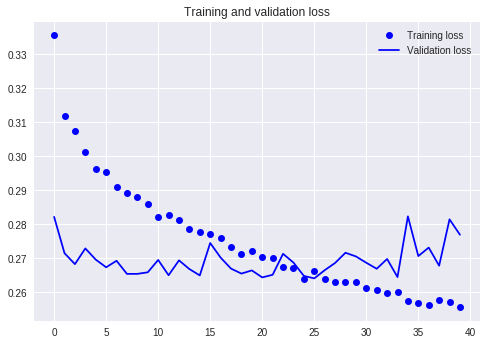

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, None, 32)          4512      
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
#Yep, doesn't look like overfitting is as much of a problem. Global minumum looks
#like 15 epochs though.
model.summary() #the summary was added and run after the next block.
#It was taking forever and wanted to double check if I was using the correct architecture.

Now its time to use bidirectional RNNs.

In [13]:
#New instance, re import
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
#studying the effects of stacking recurrent layers firsthand... again.
model = Sequential()
model.add(layers.GRU(32,dropout=0.1,recurrent_dropout=0.5,return_sequences=True,input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,validation_data=val_gen,validation_steps=val_steps)
#had to 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
500/500 [==============================] - 362s 724ms/step - loss: 0.3330 - val_loss: 0.2752
Epoch 2/40
500/500 [==============================] - 359s 718ms/step - loss: 0.3120 - val_loss: 0.2719
Epoch 3/40
500/500 [==============================] - 359s 718ms/step - loss: 0.3055 - val_loss: 0.2689
Epoch 4/40
500/500 [==============================] - 360s 719ms/step - loss: 0.3019 - val_loss: 0.2715
Epoch 5/40
500/500 [==============================] - 359s 718ms/step - loss: 0.2978 - val_loss: 0.2681
Epoch 6/40
500/500 [==============================] - 359s 718ms/step - loss: 0.2952 - val_loss: 0.2687
Epoch 7/40
500/500 [==============================] - 359s 719ms/step - loss: 0.2931 - val_loss: 0.2701
Epoch 8/40
500/500 [=================

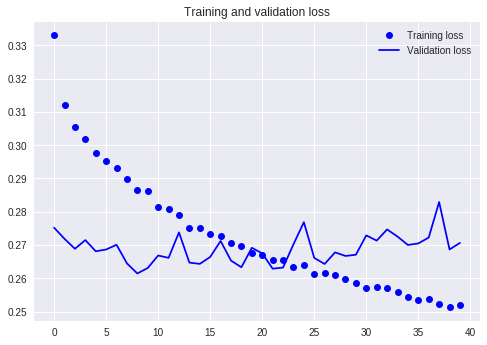

In [14]:
#I HAD TO RUN THIS LAST BLOCK TWICE BECAUSE WINDOWS UPDATE
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
#moment of truth after like 8 hours

In [4]:
#This new instance (computer turned off again), going to reimport rather than run previous cells again
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
#features again
max_features = 10000
maxlen = 500
# Need to get the IMDB data back from the beginning, I reload it here.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
#Create bidirectional RNN to analyze the IMDB dataset
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 155s 8ms/step - loss: 0.5575 - acc: 0.7221 - val_loss: 0.4312 - val_acc: 0.8340
Epoch 2/10
20000/20000 [==============================] - 152s 8ms/step - loss: 0.3539 - acc: 0.8667 - val_loss: 0.3235 - val_acc: 0.8820
Epoch 3/10
20000/20000 [==============================] - 153s 8ms/step - loss: 0.2873 - acc: 0.8982 - val_loss: 0.3033 - val_acc: 0.8806
Epoch 4/10
20000/20000 [==============================] - 152s 8ms/step - loss: 0.2337 - acc: 0.9148 - val_loss: 0.3405 - val_acc: 0.8716
Epoch 5/10
20000/20000 [==============================] - 152s 8ms/step - loss: 0.2045 - acc: 0.9271 - val_loss: 0.3227 - val_acc: 0.8880
Epoch 6/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.1813 - acc: 0.9375 - val_loss: 0.4227 - val_acc: 0.8508
Epoch 7/10
20000/20000 [==============================] - 152s 8ms/step - loss: 0.1720 - acc: 0.9402 - val_loss: 0.3461 - v

10 epochs of 1 bidirectional RNN layer outperforms 5 epochs of stacked RNNs from before! 

In [0]:
model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,validation_data=val_gen,validation_steps=val_steps)
#Applying the bidirectional model to the temperature prediction problem
#Performs slightly worse than the stacked monodirectional RNNS
#Chronological order is therefore important!

Epoch 1/40
500/500 [==============================] - 197s 393ms/step - loss: 0.2996 - val_loss: 0.2753
Epoch 2/40
500/500 [==============================] - 196s 393ms/step - loss: 0.2758 - val_loss: 0.2655
Epoch 3/40
500/500 [==============================] - 197s 394ms/step - loss: 0.2686 - val_loss: 0.2719
Epoch 4/40
500/500 [==============================] - 197s 395ms/step - loss: 0.2612 - val_loss: 0.2640
Epoch 5/40
500/500 [==============================] - 195s 389ms/step - loss: 0.2563 - val_loss: 0.2679
Epoch 6/40
500/500 [==============================] - 194s 388ms/step - loss: 0.2502 - val_loss: 0.2692
Epoch 7/40
500/500 [==============================] - 193s 387ms/step - loss: 0.2450 - val_loss: 0.2837
Epoch 8/40
500/500 [==============================] - 194s 387ms/step - loss: 0.2393 - val_loss: 0.2746
Epoch 9/40
500/500 [==============================] - 192s 384ms/step - loss: 0.2324 - val_loss: 0.2796
Epoch 10/40
500/500 [==============================] - 193s 386m